# Introduction to linear regression using Python

In [2]:
from sklearn import linear_model, metrics, model_selection
import numpy as np
import matplotlib.pyplot as plt


## Ice cream sales vs temperature data set

In [3]:
#                     Temp C   Sales
data_set = np.array([[11.9,     185],
                     [12.9,     190],
                     [13.1,     192],
                     [13.4,     196],
                     [13.6,     200],
                     [14.1,     220],
                     [14.3,     251],
                     [14.4,     255],
                     [13.4,     214],
                     [13.6,     223],
                     [14.1,     230],
                     [14.3,     260],
                     [14.4,     255],
                     [14.8,     319],
                     [15.0,     309],
                     [15.2,     305],
                     [15.2,     300],
                     [16.4,     332],
                     [17.2,     420],
                     [17.2,     400],
                     [18.1,     412],
                     [18.5,     440],
                     [19.4,     415],
                     [19.6,     436],
                     [19.8,     470],
                     [20.1,     440],
                     [20.1,     460],
                     [19.4,     435],
                     [17.2,     385],
                     [18.1,     405],
                     [18.5,     420],
                     [19.4,     435],
                     [19.6,     430],
                     [19.8,     445],
                     [20.1,     439],
                     [20.1,     451],
                     [19.4,     410],
                     [19.6,     420],
                     [19.8,     415],
                     [20.1,     430],
                     [20.1,     490],
                     [20.6,     485],
                     [19.6,     446],
                     [19.8,     440],
                     [20.1,     476],
                     [20.1,     460],
                     [20.6,     485],
                     [21.1,     460],
                     [21.5,     520],
                     [22.1,     495],
                     [22.6,     560],
                     [23.4,     543],
                     [24.0,     569],
                     [21.1,     458],
                     [21.5,     512],
                     [22.1,     508],
                     [22.6,     530],
                     [23.4,     546],
                     [24.0,     540],
                     [25.1,     614],])

## Split the data into training/testing sets

In [4]:
train, test = model_selection.train_test_split(data_set, test_size = 0.3)

train_X = train[0:train.shape[0], 0:1]
train_y = train[0:train.shape[0], 1:2]

test_X = test[0:test.shape[0], 0:1]
test_y = test[0:test.shape[0], 1:2]

### Look at the data? 

In [8]:
#train
#test
test.shape
#train_X
#train_y

(18, 2)

## Train linear regression model

The goal of a linear regression model is fit a linear function to a set of data points.
The function is "Y = β0 + β1*X1 + β2*X2 + … + βn*Xn", Where Y is the target variable, and X1, X2, ... Xn are the predictor variables and  β1, β2, … βn are the coefficients that multiply the predictor variables. β0 is constant.

In [9]:
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Get some scores

In [10]:
# The mean squared error
print("Mean squared error: %.2f" 
      % np.mean((linear_regression_model.predict(test_X) - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linear_regression_model.score(test_X, test_y))

# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
# Explained R^2 Regression score: 1 is perfect prediction
print("R^2 Regression score:", metrics.r2_score(test_y, linear_regression_model.predict(test_X)))

Mean squared error: 538.69
Variance score: 0.95
R^2 Regression score: 0.95329989963


## Plot!

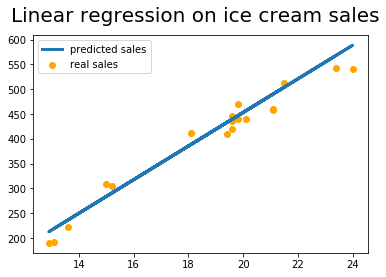

In [11]:
fig = plt.figure()
plt.scatter(test_X, test_y, color='orange', label="real sales")
plt.plot(test_X, linear_regression_model.predict(test_X), linewidth=3, label="predicted sales")
plt.legend(loc='best')
fig.suptitle("Linear regression on ice cream sales", fontsize=20)
plt.show()